In [50]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy import stats

In [51]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [52]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [53]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [54]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0eb8a9a36f66204a6c181b6165f05eed


In [55]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | pilar
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | gossaigaon
Processing Record 14 of Set 1 | jumla
Processing Record 15 of Set 1 | half moon bay
Processing Record 16 of Set 1 | aplahoue
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | saint-philip

Processing Record 32 of Set 4 | mikhaylovka
Processing Record 33 of Set 4 | agadez
Processing Record 34 of Set 4 | fallon
Processing Record 35 of Set 4 | araouane
Processing Record 36 of Set 4 | kaltenkirchen
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | moose factory
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | dashitou
Processing Record 41 of Set 4 | la ronge
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | lewistown
Processing Record 44 of Set 4 | belyy yar
Processing Record 45 of Set 4 | strezhevoy
Processing Record 46 of Set 4 | mayumba
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | golden
Processing Record 49 of Set 4 | mizpe ramon
City not found. Skipping...
Processing Record 50 of Set 4 | paka
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | ondjiva
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | qu

Processing Record 25 of Set 8 | saint-leu
Processing Record 26 of Set 8 | lokosovo
Processing Record 27 of Set 8 | mandalgovi
Processing Record 28 of Set 8 | klaksvik
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | broken hill
Processing Record 31 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 32 of Set 8 | abu samrah
Processing Record 33 of Set 8 | port macquarie
Processing Record 34 of Set 8 | raudeberg
Processing Record 35 of Set 8 | buin
Processing Record 36 of Set 8 | caravelas
Processing Record 37 of Set 8 | ambilobe
Processing Record 38 of Set 8 | morant bay
Processing Record 39 of Set 8 | mana
Processing Record 40 of Set 8 | yabrud
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | tchollire
Processing Record 43 of Set 8 | krasnoselkup
Processing Record 44 of Set 8 | nam tha
City not found. Skipping...
Processing Record 45 of Set 8 | essau
Processing Record 46 of Set 8 | chokwe
Pro

Processing Record 13 of Set 12 | los palacios
Processing Record 14 of Set 12 | zhigansk
Processing Record 15 of Set 12 | astana
Processing Record 16 of Set 12 | strizhi
Processing Record 17 of Set 12 | aguimes
Processing Record 18 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 12 | kavaratti
Processing Record 20 of Set 12 | bako
Processing Record 21 of Set 12 | puerto leguizamo
Processing Record 22 of Set 12 | hauterive
Processing Record 23 of Set 12 | kungalv
Processing Record 24 of Set 12 | kokopo
Processing Record 25 of Set 12 | amazar
Processing Record 26 of Set 12 | magadan
Processing Record 27 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 28 of Set 12 | asosa
Processing Record 29 of Set 12 | lensk
Processing Record 30 of Set 12 | tura
Processing Record 31 of Set 12 | oranjemund
Processing Record 32 of Set 12 | camana
Processing Record 33 of Set 12 | chumikan
Processing Record 34 of Set 12 | seoul
Processing Record 35 of Set 12 |

In [56]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.00,24.73,57.00,91,100,1.99,ZA,2020-11-06 17:00:29
1,Albany,42.60,-73.97,66.99,40,8,4.29,US,2020-11-06 16:55:49
2,Pilar,-9.60,-35.96,86.00,66,40,12.75,BR,2020-11-06 17:00:29
3,Port Alfred,-33.59,26.89,65.34,77,100,20.36,ZA,2020-11-06 16:56:34
4,Bluff,-46.60,168.33,46.42,85,12,11.70,NZ,2020-11-06 17:00:30
5,Busselton,-33.65,115.33,61.00,45,1,12.24,AU,2020-11-06 17:00:30
6,Mataura,-46.19,168.86,39.36,95,6,2.93,NZ,2020-11-06 17:00:30
7,Cherskiy,68.75,161.30,12.52,95,24,16.04,RU,2020-11-06 17:00:31
8,Arraial Do Cabo,-22.97,-42.03,71.60,73,75,13.87,BR,2020-11-06 17:00:31
9,Atuona,-9.80,-139.03,77.92,76,67,19.80,PF,2020-11-06 17:00:31


In [57]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [59]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604682152.597049

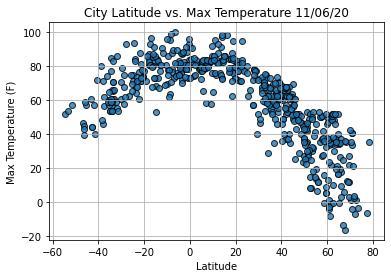

In [60]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

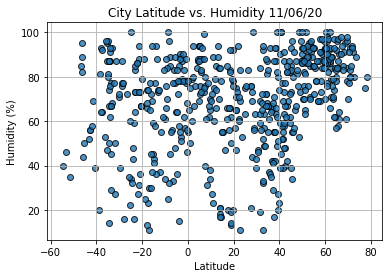

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

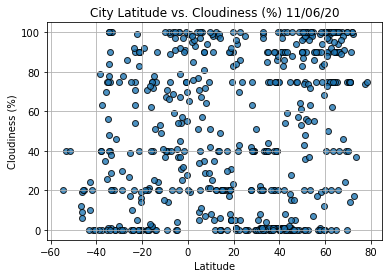

In [62]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

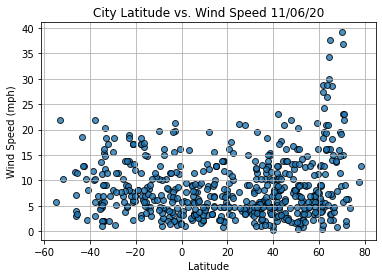

In [63]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [68]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Albany,42.60,-73.97,66.99,40,8,4.29,US,2020-11-06 16:55:49
7,Cherskiy,68.75,161.30,12.52,95,24,16.04,RU,2020-11-06 17:00:31
10,Tuktoyaktuk,69.45,-133.04,12.20,78,75,11.41,CA,2020-11-06 16:56:26
11,Gossaigaon,26.45,89.99,66.36,83,0,3.91,IN,2020-11-06 17:00:31
12,Jumla,29.27,82.18,40.17,63,0,4.00,NP,2020-11-06 17:00:32


In [70]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

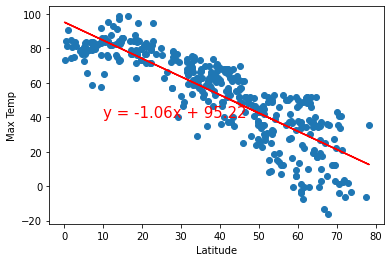

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(10,40))

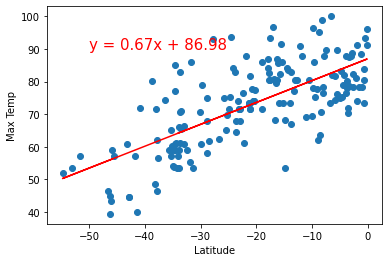

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(-50,90))

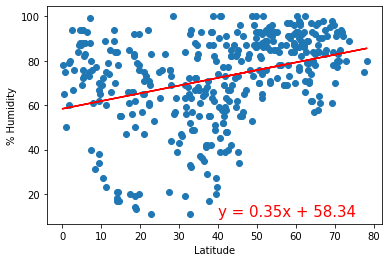

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

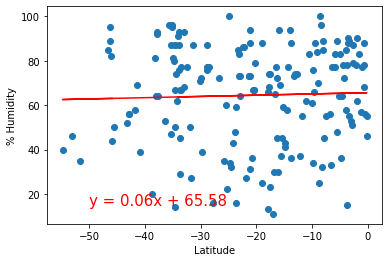

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,15))

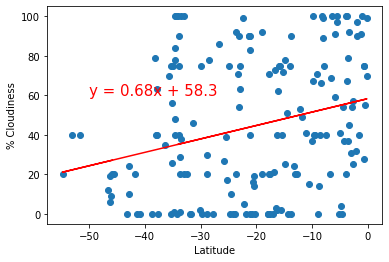

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

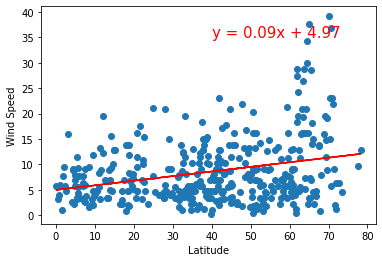

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(40,35))

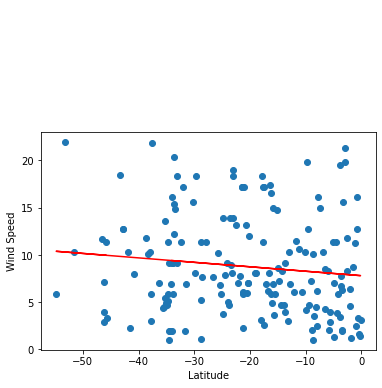

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,35))
